In [1]:
import pandas as pd
from Bio import SeqIO
import os

In [2]:
# latest paftol export containing ENA sample accessions
# https://www.ebi.ac.uk/ena/submit/report/swagger-ui.html#/samples/findAllUsingGET_13
pft_file = '../PAFTOL_DB/2022-03-14_paftol_export_stats.csv'
cptree_file = 'cpTree_v7/cpTree_v7_tree_clean.csv'
DataSource = 'PAFTOL' 
org_dir = 'C:/Data/PAFTOL/Organelles/'

In [3]:
## All Validated Samples
R = pd.read_csv(cptree_file)
R = R[R.DataSource==DataSource]
subset = R.Sample_Name.to_list()
print(R.shape[0],subset[:2])

3451 ['PAFTOL_004799', 'PAFTOL_000992']


## Load data and subset

In [6]:
pdir = DataSource + '/'
sdir = 'ENA_submissions/' + pdir
if not os.path.exists(sdir):
    os.makedirs(sdir)

In [15]:
# Load GetOrg result table
Org_df = pd.read_csv(org_dir + DataSource + '/' + DataSource + '_Organelle_Recovery.csv').astype({'idSequencing':'int'})
if DataSource == 'PAFTOL':
    Org_df['Geseq_name'] = Org_df.Sample_Name.str.replace('PAFTOL_','Pis_')
elif DataSource in ['GAP']:
    Org_df['Geseq_name'] = Org_df.Sample_Name
elif DataSource in ['SRA']:
    sra2_pt = pd.read_csv('cpSRA_GetOrg/cpSRA_GetOrg_Organelle_Recovery.csv')
    Org_df = pd.concat([Org_df,sra2_pt],ignore_index=True)
    Org_df = Org_df.groupby('Sample_Name').head(1)
    Org_df['Geseq_name'] = Org_df.Sample_Name
print(Org_df.shape[0])
Org_df[:2]

9715


,idPaftol,idSequencing,Sample_Name,Project,order,family,genus,species,Taxonomical_Notes,SumContigLength,...,Coverage_Kmer,Coverage_base,Run_Time,maxK,NRepeat_Pattern,NPath,Redo_FastPlast,error_pt,error_nr,Geseq_name
0,2,961,PAFTOL_000961,Pilot,Ranunculales,Circaeasteraceae,Circaeaster,agrestis,NaN,138795.0,...,59.4,90.7,329.43,105.0,NaN,NaN,False,NaN,NaN,Pis_000961
1,4,2571,PAFTOL_002571,Connaraceae,Oxalidales,Connaraceae,Rourea,minor,NaN,213954.0,...,18.5,60.2,747.57,105.0,NaN,NaN,False,NaN,NaN,Pis_002571


In [16]:
if subset is not None:
    Org_df = Org_df[Org_df.Sample_Name.isin(subset)]
    print(Org_df.shape[0],Org_df.Sample_Name.nunique())

3451 3451


In [17]:
# Load paftol export and merge ena sample IDs
db = pd.read_csv(pft_file)
db = db[db.idPaftol.notnull()].astype({'idPaftol':'int','idSequencing':'int'})
db = db[['Sample_Name','idPaftol', 'DataSource', 'Project', 'Order', 'Family', 'Genus', 'Species', 'Taxonomical_Notes', 
         'ENASampleNum', 'idSequencing', 'ExternalSequenceID', 'ENAExpNumber',
       'ENARunNumber', 'NumReads', 'NumRecoveredGenes', 'SumContigLength','NCBI_TaxID', 'NCBI_sciname']]
#        'title', 'taxId','id', 'alias', 'firstCreated', 'firstPublic', 'releaseStatus', 'secondaryId', 'scientificName', 'commonName']]
db[:2]

,Sample_Name,idPaftol,DataSource,Project,Order,Family,Genus,Species,Taxonomical_Notes,ENASampleNum,idSequencing,ExternalSequenceID,ENAExpNumber,ENARunNumber,NumReads,NumRecoveredGenes,SumContigLength,NCBI_TaxID,NCBI_sciname
0,PAFTOL_000564,1,PAFTOL,Asteraceae,Asterales,Asteraceae,Gymnolaena,sp.,Initially recorded as Gymnolaena litoralis but...,NaN,564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PAFTOL_000961,2,PAFTOL,Pilot,Ranunculales,Circaeasteraceae,Circaeaster,agrestis,NaN,ERS5501508,961,NaN,ERX4839538,ERR5033191,625228.0,332.0,138795.0,39288.0,Circaeaster agrestis


In [18]:
Org_df = pd.merge(Org_df,
         db[['Sample_Name','DataSource','ENASampleNum','ENAExpNumber','ENARunNumber','NCBI_TaxID','NCBI_sciname']],
        how='left',on='Sample_Name').groupby('Sample_Name').head(1)
print(Org_df.isna().sum().to_dict())
print(Org_df.shape[0],Org_df.Sample_Name.nunique())

{'idPaftol': 0, 'idSequencing': 0, 'Sample_Name': 0, 'Project': 0, 'order': 0, 'family': 0, 'genus': 0, 'species': 0, 'Taxonomical_Notes': 2231, 'SumContigLength': 363, 'sci_name': 0, 'log_pt': 0, 'log_nr': 0, 'pt_recovered': 0, 'Nseq_pt': 0, 'Sum_len_pt': 0, 'Nanybase_pt': 0, 'nr_recovered': 0, 'Nseq_nr': 27, 'Sum_len_nr': 27, 'Nanybase_nr': 27, 'Completed_Reads': 0, 'Completed_Extending': 0, 'Completed_Assembly': 0, 'Completed_Slimming': 0, 'Completed_Output': 0, 'Warning_Look': 0, 'Warning_Multi_Structure': 0, 'Warning_Self_Loop': 0, 'Info_Large_Repeats': 0, 'Info_Disentangling_Failed': 0, 'Assembly': 6, 'Coverage_Kmer': 635, 'Coverage_base': 8, 'Run_Time': 5, 'maxK': 6, 'NRepeat_Pattern': 3380, 'NPath': 3422, 'Redo_FastPlast': 0, 'error_pt': 3450, 'error_nr': 3432, 'Geseq_name': 0, 'DataSource': 0, 'ENASampleNum': 47, 'ENAExpNumber': 0, 'ENARunNumber': 0, 'NCBI_TaxID': 172, 'NCBI_sciname': 172}
3451 3451


In [19]:
geseq_dir = sdir + 'fasta/'
if not os.path.exists(geseq_dir):
    os.makedirs(geseq_dir)

# Distribution of contigs

In [40]:
Seq_ls = []
for idx, row in Org_df.iterrows():
    for record in SeqIO.parse(org_dir + DataSource + '/' + 'fasta_pt/' + row.Sample_Name + '_pt.fasta', "fasta"):
        Seq_ls.append({'Sample_Name':row.Sample_Name,'SeqID':record.id,'SeqLen':len(record.seq)})

15178 1612
{0.1: 469.0, 0.5: 2199.0, 0.9: 20300.4} 0.7155751745948082


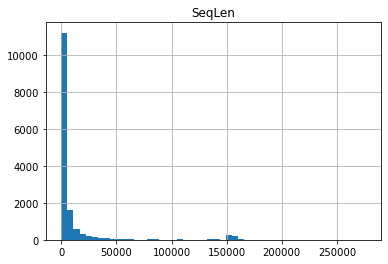

In [41]:
Seq_df = pd.DataFrame(Seq_ls)
print(Seq_df.shape[0], Seq_df.Sample_Name.nunique())
print(Seq_df.SeqLen.quantile([.1,.5,.9]).round(1).to_dict(),(Seq_df.SeqLen<5000).sum()/Seq_df.shape[0])
Seq_df.head(2)
Seq_df.hist(bins=50);

# Whole plastomes
### Annotation

In [22]:
whole_pt = Org_df[(Org_df.Assembly.isin(['circular genome','circular genome with gaps']) & (Org_df.Sum_len_pt>80000))]
print(whole_pt.shape[0],'samples',whole_pt.genus.nunique(),'genera')
whole_pt[:2]

337 samples 280 genera


,idPaftol,idSequencing,Sample_Name,Project,order,family,genus,species,Taxonomical_Notes,SumContigLength,...,Redo_FastPlast,error_pt,error_nr,Geseq_name,DataSource,ENASampleNum,ENAExpNumber,ENARunNumber,NCBI_TaxID,NCBI_sciname
0,2,961,PAFTOL_000961,Pilot,Ranunculales,Circaeasteraceae,Circaeaster,agrestis,NaN,138795.0,...,False,NaN,NaN,Pis_000961,PAFTOL,ERS5501508,ERX4839538,ERR5033191,39288.0,Circaeaster agrestis
6,11,12989,PAFTOL_012989,Achariaceae,Malpighiales,Achariaceae,Gynocardia,odorata,NaN,NaN,...,False,NaN,NaN,Pis_012989,PAFTOL,ERS8701094,ERX8772557,ERR9229774,124848.0,Gynocardia odorata


In [ ]:
# Output fasta files 
for idx, row in whole_pt.iterrows():
    seqs = list(SeqIO.parse(org_dir + DataSource + '/' + 'fasta_pt/' + row.Sample_Name + '_pt.fasta',format='fasta'))
    # Verif only 1 sequence
    if len(seqs) > 1:
        print('error, more than 1 sequence')
        pass
    seq = seqs[0]
    print(row.Sample_Name, row.Geseq_name, row.family, row.sci_name,len(seq),seq.seq.count('N'))
    seq.id = row.Geseq_name
    seq.description = ''
    SeqIO.write(seq, geseq_dir + row.Geseq_name + '-circular.fasta',format='fasta')

Submit files to GeSeq https://chlorobox.mpimp-golm.mpg.de/geseq.html and extract zip file in wdir/GeSeq_output

In [23]:
whole_pt.to_csv(sdir + DataSource + '_wholePT.csv',index=False)

# Contigs

In [46]:
contigs_pt = Org_df[(Org_df.Assembly.isin(['circular genome','circular genome with gaps'])==False) &
                   (Org_df.pt_recovered==True)]
print(contigs_pt.shape[0],'samples',contigs_pt.genus.nunique(),'genera')
contigs_pt[:2]

1275 samples 1071 genera


,Assembly,Completed_Assembly,Completed_Extending,Completed_Output,Completed_Reads,Completed_Slimming,Coverage_Kmer,Coverage_base,Info_Disentangling_Failed,Info_Large_Repeats,...,sci_name,species,sum_len,Geseq_name,DataSource,ENASampleNum,ENAExpNumber,ENARunNumber,NCBI_TaxID,NCBI_sciname
0,scaffold,True,True,True,True,True,153.2,492.1,True,False,...,Abelmoschus esculentus,esculentus,260382.0,SRR5819803,SRA,NaN,NaN,SRR5819803,455045.0,Abelmoschus esculentus
1,scaffold,True,True,True,False,True,99.4,569.5,True,False,...,Abronia maritima,maritima,258912.0,SRR6435332,SRA,NaN,NaN,SRR6435332,2067806.0,Abronia maritima


In [ ]:
# Output fasta files
min_len = 50000
contigs_pt['Np_contigs'] = 0; contigs_pt['Sump_contigs'] = 0;
for idx, row in contigs_pt.iterrows():
    contigx = 1
    for seq in SeqIO.parse(org_dir + DataSource + '/' + 'fasta_pt/' + row.Sample_Name + '_pt.fasta',format='fasta'):
        # if longer than
        if len(seq) > min_len:
            if '--' in seq.id:
                seq.description = '' # seq.id.split('--')[0] + ' contig_info:' + seq.id.split('--')[1] + ', length:' + str(len(seq.seq))
                seq.id = row.Geseq_name + '-' + str(contigx)
            elif 'circular' in seq.id:
                seq.description = 'circular' + ' contig_info:' + seq.id.split('-')[0] + ', length:' + str(len(seq.seq))
                seq.id = row.Geseq_name + '-' + 'circular'
            SeqIO.write(seq, geseq_dir + seq.id + '.fasta',format='fasta')
            contigs_pt.loc[idx,'Np_contigs'] += 1; contigs_pt.loc[idx,'Sump_contigs'] += len(seq)
            contigx += 1
    if contigs_pt.loc[idx,'Np_contigs']>0:
        print(row.Sample_Name, row.Geseq_name, row.family, row.sci_name,row.Sum_len_pt,
              contigs_pt.loc[idx,'Np_contigs'],contigs_pt.loc[idx,'Sump_contigs'])

In [48]:
contigs_pt = contigs_pt[contigs_pt.Np_contigs>0]
print(contigs_pt.Np_contigs.sum(), contigs_pt.shape[0],'samples',contigs_pt.genus.nunique(),'genera')
contigs_pt.to_csv(sdir + DataSource + '_contigsPT.csv',index=False)

488 456 samples 392 genera


### ENA submission
https://ena-docs.readthedocs.io/en/latest/submit/fileprep/assembly.html?highlight=chloroplast#

cd C:\Data\PAFTOL\cpDNA\ENA_submissions

In [4]:
paper_title = 'Building the largest, curated plastid genome dataset and phylogeny by leveraging nuclear-oriented sequence data'
paper_authors = 'KEVIN LEEMPOEL1, PAUL BAILEY1, ELAINE FRANCOSO1, BERTA GALLEGO1, De-Zhu Li2,3,4, Hong-Tao Li2,3, OLIVIER MAURIN1, SHYAMALI ROY1,' +  \
            'Jun-Bo Yang2,3, Ting-Shuang Yi2,3, ALEXANDRE R. ZUNTINI1, WOLF L. EISERHARDT1,5,' +  \
            'PAUL J. KERSEY1, ILIA J. LEITCH1, FELIX FOREST1 AND WILLIAM J. BAKER1'
paper_journal = 'Unpublished'
paper_id = 'NA'

In [7]:
whole_pt = pd.read_csv(sdir + DataSource + '_wholePT.csv')
print(whole_pt.shape[0])
whole_pt = whole_pt[(whole_pt.ENASampleNum.notnull()) & (whole_pt.ENARunNumber.notnull())]
print(whole_pt.shape[0])
whole_pt = whole_pt[whole_pt.NCBI_sciname.notnull()]
print(whole_pt.shape[0])
whole_pt.head(2)

337
331
317


,idPaftol,idSequencing,Sample_Name,Project,order,family,genus,species,Taxonomical_Notes,SumContigLength,...,Redo_FastPlast,error_pt,error_nr,Geseq_name,DataSource,ENASampleNum,ENAExpNumber,ENARunNumber,NCBI_TaxID,NCBI_sciname
0,2,961,PAFTOL_000961,Pilot,Ranunculales,Circaeasteraceae,Circaeaster,agrestis,NaN,138795.0,...,False,NaN,NaN,Pis_000961,PAFTOL,ERS5501508,ERX4839538,ERR5033191,39288.0,Circaeaster agrestis
1,11,12989,PAFTOL_012989,Achariaceae,Malpighiales,Achariaceae,Gynocardia,odorata,NaN,NaN,...,False,NaN,NaN,Pis_012989,PAFTOL,ERS8701094,ERX8772557,ERR9229774,124848.0,Gynocardia odorata


In [ ]:
# Rename and modify genbank files, convert to embl flat file
if not os.path.exists(sdir + '/Genbank_files/'):
    os.makedirs(sdir + '/Genbank_files/')
gb_files = [file for file in os.listdir(sdir + 'geseq/') if file.endswith('.gb')]
print(len(gb_files))
for idx, row in whole_pt.iterrows():
    idx_file = [i for i, x in enumerate([row.Geseq_name in file for file in gb_files]) if x]
    for index, record in enumerate(SeqIO.parse(sdir + 'geseq/' + gb_files[idx_file[0]], "genbank")):
        try:
            print(record.id)
            record.id = row.ENASampleNum + '_pt'
            record.name = row.ENARunNumber + '_pt'
            record.description = row.ENARunNumber + ' (' + row.Sample_Name + ') chloroplast, complete genome'
            record.version = row.ENARunNumber + '.1'
            record.annotations['source'] = row.ENASampleNum + ', ' + row.sci_name + ', isolate'
            record.annotations['accessions'] = row.ENASampleNum
            record.annotations['organism'] = row.NCBI_sciname
            record.annotations["data_file_division"]="PLN";
            record.annotations.pop('taxonomy')
            record.annotations['references'][0].title = paper_title    
            record.annotations['references'][0].authors = paper_authors    
            record.annotations['references'][0].journal = paper_journal      
            record.annotations['references'][0].pubmed_id = paper_id    
            record.features[0].qualifiers['organism'] = row.NCBI_sciname
            record.features[0].qualifiers['db_xref'] = ['taxon:' + str(int(row['NCBI_TaxID']))]
            SeqIO.write(record,sdir + '/Genbank_files/' + row.Sample_Name + '_pt.gb',format='genbank')
        except:
            print('issue with ',gb_files[idx_file[0]])

In [8]:
def del_features(records, feat_del_ls = ['translation','info','annotator']):
    for feature in records.features:
        for feat_to_del in feat_del_ls:
            if feat_to_del in feature.qualifiers:
                del feature.qualifiers[feat_to_del]
    return records
def del_fragment(records, ls_types = ['gene','CDS','rRNA']):
    # list gene names
    ls_feat = []
    for feature in records.features:
        if feature.type in ls_types:
            ls_feat.append(feature.qualifiers['gene'][0])
    # remove fragments from list
#     print(len(ls_feat),end='>')
    ls_feat = [ifeat for ifeat in ls_feat if 'fragment' not in ifeat]
#     print(len(ls_feat))
    
    # remove fragment feature if full feature is present
    rm_count = 0
    for feature in records.features:
#         print(feature.type, feature.qualifiers)
        if feature.type in ls_types:
            if 'fragment' in feature.qualifiers['gene'][0]:
#                 print(feature.type, feature.qualifiers,end=':')
                if feature.qualifiers['gene'][0].split('-')[0] in ls_feat:
                    rm_count += 1
#                     print('true')
                    records.features.remove(feature)
    print('removed',rm_count,'partial features')
    return records
def del_longfeat(records, ls_types = ['gene','CDS','rRNA'], len_thrs = 5000):
    for feature in records.features:
        if feature.type in ls_types:
            if len(feature)>len_thrs:
                print('removing ',feature.qualifiers['gene'],len(feature))
                records.features.remove(feature)
    return records
def gzip_file(in_file):
    import gzip
    import shutil
    f_gz = in_file + '.gz'
    with open(in_file, 'rb') as f_in:
        with gzip.open(f_gz, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

In [ ]:
# Whole plastomes
if not os.path.exists(sdir + '/EMBL_files/'):
    os.makedirs(sdir + '/EMBL_files/')
commands = []
for idx, row in whole_pt.iterrows():
    ### Convert .gb to EMBL flat files
    file_gb = sdir + '/Genbank_files/' + row.Sample_Name + '_pt.gb'
    records = list(SeqIO.parse(file_gb, "genbank"))[0]
    print(row.Sample_Name,len(records))
    records_clean = del_fragment(records); records_clean = del_fragment(records_clean); records_clean = del_fragment(records_clean)
    records_clean = del_longfeat(records_clean,len_thrs=10000);
    file_embl = sdir + '/EMBL_files/' + row.Sample_Name + '.embl'
    SeqIO.write(records_clean, file_gb, "genbank")
    SeqIO.write(records_clean, file_embl, "embl")
    gzip_file(file_embl)
    ### Chromosome list file
    # https://ena-docs.readthedocs.io/en/latest/submit/fileprep/assembly.html?highlight=chloroplast#chromosome-list-file
    list_file=row.ENASampleNum + '_pt	PT	Circular-Chromosome	Chloroplast'
    with open(file_embl.replace('.embl','_CHR.txt'), 'wb') as f:
        f.write(list_file.encode("ascii"))
    gzip_file(file_embl.replace('.embl','_CHR.txt'))
    ### Manifest file 
    # https://ena-docs.readthedocs.io/en/latest/submit/assembly/genome.html 
    manifest_file = file_embl.replace('.embl','_manifest.txt')
    manifest={
    'STUDY':'PRJEB35285', #https://www.ncbi.nlm.nih.gov/bioproject/588607
    'SAMPLE':row.ENASampleNum,
    'ASSEMBLYNAME':row.ENASampleNum + '_pt',
    'ASSEMBLY_TYPE':'clone or isolate',
    'COVERAGE':row.Coverage_base,
    'PROGRAM':'GetOrganelle v1.7.5 +  GeSeq 2.03',
    'PLATFORM':'ILLUMINA',
    'MOLECULETYPE':'genomic DNA',
    'FLATFILE': row.Sample_Name + '.embl.gz',
    'CHROMOSOME_LIST': row.Sample_Name + '_CHR.txt.gz',
    'DESCRIPTION': row.NCBI_sciname + ' chloroplast, complete genome'
    }
    manifest = pd.DataFrame.from_dict(manifest,orient='index')
    manifest.to_csv(manifest_file,header=None,sep='\t')
    
    # Submission command
    commands.append('java -jar C:/Data/PAFTOL/ENA_submissions/webin-cli-4.3.0.jar ' + 
          '-username Webin-52995 -passwordFile C:/Data/PAFTOL/ENA_submissions/ena_pwd.txt -context genome -manifest ' +
          row.Sample_Name + '_manifest.txt' + ' -validate') 
pd.DataFrame(commands).to_csv(sdir + '/Commands_WholePT.txt',index=False,header=None)

In [16]:
# Long Contigs
contigs_pt = pd.read_csv(sdir + DataSource + '_contigsPT.csv')
print(contigs_pt.shape[0])
contigs_pt = contigs_pt[(contigs_pt.ENASampleNum.notnull()) & (contigs_pt.ENARunNumber.notnull())]
print(contigs_pt.shape[0])
contigs_pt = contigs_pt[contigs_pt.NCBI_sciname.notnull()]
print(contigs_pt.shape[0])
contigs_pt.head(2)

286
213
204


,idPaftol,idSequencing,Sample_Name,Project,order,family,genus,species,Taxonomical_Notes,SumContigLength,...,error_nr,Geseq_name,DataSource,ENASampleNum,ENAExpNumber,ENARunNumber,NCBI_TaxID,NCBI_sciname,Np_contigs,Sump_contigs
0,6,960,PAFTOL_000960,Pilot,Caryophyllales,Dioncophyllaceae,Triphyophyllum,peltatum,NaN,176331.0,...,NaN,Pis_000960,PAFTOL,ERS5477005,ERX4815054,ERR5006122,63090.0,Triphyophyllum peltatum,1,141085
1,30,946,PAFTOL_000946,Pilot,Zygophyllales,Zygophyllaceae,Zygophyllum,fabago,NaN,185529.0,...,NaN,Pis_000946,PAFTOL,ERS4591016,ERX4143467,ERR4180043,66652.0,Zygophyllum fabago,1,103382


In [30]:
# Rename and modify genbank files, convert to embl flat file
if not os.path.exists(sdir + '/Genbank_files/'):
    os.makedirs(sdir + '/Genbank_files/')
gb_files = [file for file in os.listdir(sdir + 'geseq/') if file.endswith('.gb')]
print(len(gb_files))
for idx, row in contigs_pt.iterrows():
    idx_file = [i for i, x in enumerate([row.Geseq_name in file for file in gb_files]) if x]
    if len(idx_file)>0:
        print(gb_files[idx_file[0]])
        for index, record in enumerate(SeqIO.parse(sdir + 'geseq/' + gb_files[idx_file[0]], "genbank")):
            try:
                print(record.id)
                record.id = row.ENASampleNum + '_pt'
                record.name = row.ENARunNumber + '_pt'
                record.description = row.ENARunNumber + ' (' + row.Sample_Name + ') chloroplast, complete genome'
                record.version = row.ENARunNumber + '.1'
                record.annotations['source'] = row.ENASampleNum + ', ' + row.sci_name + ', isolate'
                record.annotations['accessions'] = row.ENASampleNum
                record.annotations['organism'] = row.NCBI_sciname
                record.annotations["data_file_division"]="PLN";
                record.annotations.pop('taxonomy')
                record.annotations['references'][0].title = paper_title    
                record.annotations['references'][0].authors = paper_authors    
                record.annotations['references'][0].journal = paper_journal      
                record.annotations['references'][0].pubmed_id = paper_id    
                record.features[0].qualifiers['organism'] = row.NCBI_sciname
                record.features[0].qualifiers['db_xref'] = ['taxon:' + str(int(row['NCBI_TaxID']))]
    #             SeqIO.write(record,sdir + '/Genbank_files/' + row.Sample_Name + '_pt.gb',format='genbank')
            except:
                print('issue with ',gb_files[idx_file[0]])

629
GeSeqJob-20220304-PAFTOL_contigs_Pis_000960-1-scaffold_1-contig_info_1966698+%2C1884030+%2C1967352_1884640+%2C1884030-%2C1976352+%2C-length_141085_GenBank.gb
Pis_000960
GeSeqJob-20220304-PAFTOL_contigs_Pis_000946-1-scaffold_1-contig_info_890838-%2C890814-%2C890844-%2C890814+%2C890846_890832-%2C-length_103382_GenBank.gb
Pis_000946
GeSeqJob-20220304-PAFTOL_contigs_Pis_002855-1-scaffold_2-contig_info_5158610+%2C5287124_1588974_5341156_5240704_5281502-%2C5322192_5288256-%2C-length_77746_GenBank.gb
Pis_002855
GeSeqJob-20220304-PAFTOL_contigs_Pis_003064-1-scaffold_1-contig_info_26170-%2C26200_24214_26206+%2C26196-%2C-length_91365_GenBank.gb
Pis_003064
GeSeqJob-20220304-PAFTOL_contigs_Pis_001065-1-scaffold_1-contig_info_750856-%2C750908-%2C750906+%2C750908+%2C750894+%2C-length_154282_GenBank.gb
Pis_001065
GeSeqJob-20220304-PAFTOL_contigs_Pis_003429-1-scaffold_1-contig_info_555578+%2C555596_555532-%2C555584+%2C555596_555532+%2C555604-%2C-length_168561_GenBank.gb
Pis_003429
GeSeqJob-2022030

C:\ProgramData\Anaconda3\lib\site-packages\Bio\GenBank\__init__.py:1265: BiopythonParserWarning: Couldn't parse feature location: 'join(65657..65662,join(66452..66908,1..17))'
  warnings.warn(


Pis_004821
GeSeqJob-20220304-PAFTOL_contigs_Pis_004822-1-scaffold_2-contig_info_95826+%2C23330_98458-%2C97298-%2C14740-%2C11814-%2C14740-%2C11814-%2C14740-%2C98598-%2C98554_96936_98704-%2C-length_53333_GenBank.gb
Pis_004822
GeSeqJob-20220304-PAFTOL_contigs_Pis_004855-1-scaffold_1-contig_info_109232_109502_109456_109164+%2C-length_63380_GenBank.gb
Pis_004855
GeSeqJob-20220304-PAFTOL_contigs_Pis_004862-1-scaffold_2-contig_info_13685+%2C20224_24275+%2C19989_124168_22081_13137_19993_111001_20228_13907_1521_1517_19693_19607+%2C-length_109279_GenBank.gb
Pis_004862
GeSeqJob-20220304-PAFTOL_contigs_Pis_004886-1-scaffold_5-contig_info_353+%2C445+%2C451_161-%2C-length_55410_GenBank.gb
Pis_004886
GeSeqJob-20220304-PAFTOL_contigs_Pis_004895-1-scaffold_3-contig_info_10575310_10637238_9168948-%2C10654934_10639212_10655560_10698948-%2C10688592_10347066-%2C10654934_10639212_10655560_10698948+%2C10582006+%2C-length_102222_GenBank.gb
Pis_004895
GeSeqJob-20220304-PAFTOL_contigs_Pis_004897-1-scaffold_1-co

C:\ProgramData\Anaconda3\lib\site-packages\Bio\GenBank\__init__.py:1265: BiopythonParserWarning: Couldn't parse feature location: 'join(49674..50064,join(50729..51017,1..40))'
  warnings.warn(



GeSeqJob-20220304-PAFTOL_contigs_Pis_006274-1-scaffold_1-contig_info_468528-%2C479306_495366_489444-%2C481272-%2C-length_58696_GenBank.gb
Pis_006274
GeSeqJob-20220304-PAFTOL_contigs_Pis_006305-1-scaffold_5-contig_info_2175992+%2C-length_54441_GenBank.gb
Pis_006305
GeSeqJob-20220304-PAFTOL_contigs_Pis_006335-1-scaffold_2-contig_info_63784+%2C-length_71734_GenBank.gb
Pis_006335
GeSeqJob-20220304-PAFTOL_contigs_Pis_006512-1-scaffold_7-contig_info_1801453_1706240+%2C-length_72264_GenBank.gb
Pis_006512
GeSeqJob-20220304-PAFTOL_contigs_Pis_006516-1-scaffold_5-contig_info_854945-%2C903783_890908+%2C893941-%2C-length_60216_GenBank.gb
Pis_006516
GeSeqJob-20220304-PAFTOL_contigs_Pis_006521-1-scaffold_1-contig_info_1933020+%2C2222033_1958909+%2C2073575_2020575-%2C-length_66130_GenBank.gb
Pis_006521
GeSeqJob-20220304-PAFTOL_contigs_Pis_006527-1-scaffold_1-contig_info_873560_888230_804625+%2C-length_82882_GenBank.gb
Pis_006527
GeSeqJob-20220304-PAFTOL_contigs_Pis_006529-1-scaffold_10-contig_info_6

C:\ProgramData\Anaconda3\lib\site-packages\Bio\GenBank\__init__.py:1265: BiopythonParserWarning: Couldn't parse feature location: 'join(48717..49269,join(50408..50913,1..90))'
  warnings.warn(


GeSeqJob-20220304-PAFTOL_contigs_Pis_010813-1-scaffold_5-contig_info_130470+%2C130496-%2C130464+%2C130504+%2C130510+%2C130446+%2C130510-%2C130504-%2C130464-%2C130496+%2C130434-%2C130498-%2C-length_118925_GenBank.gb
Pis_010813
GeSeqJob-20220304-PAFTOL_contigs_Pis_010889-1-scaffold_3-contig_info_43650+%2C44240+%2C44150+%2C44240-%2C44110-%2C44222+%2C44244-%2C-length_130236_GenBank.gb
Pis_010889
GeSeqJob-20220304-PAFTOL_contigs_Pis_010915-1-scaffold_1-contig_info_241316-%2C241576_241582-%2C241416-%2C241576_241582+%2C241558_241564-%2C-length_154029_GenBank.gb
Pis_010915
GeSeqJob-20220304-PAFTOL_contigs_Pis_011991-1-scaffold_2-contig_info_192310+%2C192326+%2C192150-%2C192326-%2C192322+%2C-length_147596_GenBank.gb
Pis_011991
GeSeqJob-20220304-PAFTOL_contigs_Pis_012011-1-scaffold_7-contig_info_312028+%2C-length_55585_GenBank.gb
Pis_012011
GeSeqJob-20220304-PAFTOL_contigs_Pis_012015-1-scaffold_1-contig_info_721228-%2C722216+%2C722106-%2C722216-%2C722146+%2C-length_115709_GenBank.gb
Pis_012015
G

In [ ]:
# Long Contigs
commands = []
for idx, row in contigs_pt.iterrows():
    ### Convert .gb to EMBL flat files
    file_gb = sdir + '/Genbank_files/' + row.Sample_Name + '_pt.gb'
    records = list(SeqIO.parse(file_gb, "genbank"))[0]
    print(row.Sample_Name,len(records))
    records_clean = del_fragment(records); records_clean = del_fragment(records_clean); records_clean = del_fragment(records_clean)
    records_clean = del_longfeat(records_clean,len_thrs=10000);
    file_embl = sdir + '/EMBL_files/' + row.Sample_Name + '.embl'
    SeqIO.write(records_clean, file_gb, "genbank")
    SeqIO.write(records_clean, file_embl, "embl")
    gzip_file(file_embl)
    ### Chromosome list file
    # https://ena-docs.readthedocs.io/en/latest/submit/fileprep/assembly.html?highlight=chloroplast#chromosome-list-file
    list_file=row.ENASampleNum + '_pt	PT	Circular-Chromosome	Chloroplast'
    with open(file_embl.replace('.embl','_CHR.txt'), 'wb') as f:
        f.write(list_file.encode("ascii"))
    gzip_file(file_embl.replace('.embl','_CHR.txt'))
    ### Manifest file 
    # https://ena-docs.readthedocs.io/en/latest/submit/assembly/genome.html 
    manifest_file = file_embl.replace('.embl','_manifest.txt')
    manifest={
    'STUDY':'PRJEB35285', #https://www.ncbi.nlm.nih.gov/bioproject/588607
    'SAMPLE':row.ENASampleNum,
    'ASSEMBLYNAME':row.ENASampleNum + '_pt',
    'ASSEMBLY_TYPE':'clone or isolate',
    'COVERAGE':row.Coverage_base,
    'PROGRAM':'GetOrganelle v1.7.5 +  GeSeq 2.03',
    'PLATFORM':'ILLUMINA',
    'MOLECULETYPE':'genomic DNA',
    'FLATFILE': row.Sample_Name + '.embl.gz',
    'CHROMOSOME_LIST': row.Sample_Name + '_CHR.txt.gz',
    'DESCRIPTION': row.NCBI_sciname + ' chloroplast, complete genome'
    }
    manifest = pd.DataFrame.from_dict(manifest,orient='index')
    manifest.to_csv(manifest_file,header=None,sep='\t')
    
    # Submission command
    commands.append('java -jar C:/Data/PAFTOL/ENA_submissions/webin-cli-4.3.0.jar ' + 
          '-username Webin-52995 -passwordFile C:/Data/PAFTOL/ENA_submissions/ena_pwd.txt -context genome -manifest ' +
          row.Sample_Name + '_manifest.txt' + ' -validate') 
pd.DataFrame(commands).to_csv(sdir + '/Commands_WholePT.txt',index=False,header=None)